# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama : Anugerah Surya Atmaja
- Email : atmajasuryaanugerah@gmail.com
- Id Dicoding: 

## Persiapan

### Menyiapkan library yang dibutuhkan

In [26]:
# === Library Dasar Python ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os

# === Library untuk Pemodelan & Machine Learning ===
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

# === Library untuk Evaluasi Model ===
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix, make_scorer

# === Library untuk Hyperparameter Tuning ===
import optuna

# Study Optuna dengan seed
sampler = optuna.samplers.TPESampler(seed=42)

### Menyiapkan data yang akan diguankan

In [27]:
data = pd.read_csv("Data/employee.csv")

## Data Understanding

### 1. Mengetahui Ringkasan Statistik dari Data

In [28]:
data.describe(include=['object','bool'])

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,3,3,6,2,9,3,1,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1043,961,606,882,326,673,1470,1054


**Penjelasan :**

Berdasarkan sampel dari beberapa variabel berkaitan dengan ringkasan statistik yang diberikan. Terlihat bahwa terdapat pola yang berbeda pada masing-masing variabel. Pada variabel Business Travel terlihat bahwa isian pegawai didominasi dengan keterangan Travel_Rarely dengan jumlah sebanyak 1043 isian. Pada variabel Gender, terlihat bahwa pegawai didominasi oleh jenis kelamin Pria yaitu sebanyak 882. Namun, nilai ini tidak terlalu berbeda signifikan dibanding variabel sebelumnya. Selain itu pegawai pada perusahaan juga didominasi oleh pegawai dengan status sudah menikah. Hal lain juga ditunjukkan oleh keterangan variabel OverTime yang menunjukkan status lembur dari pekerja. Terlihat bahwa pekerja cenderung memilih untuk Tidak Lembur.

In [29]:
data.describe(include=['int','float'])

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


**Penjelasan :**

Berdasarkan ringkasan statistik yang diperoleh untuk sampel beberapa variabel, terlihat bahwa terdapat variabel yang memiliki *missing value* yaitu variabel target **Atrrition Rates**. Hal ini menunjukkan terdapat beberapa pegawai yang tidak memberikan respon atas pengumpulan data yang dilakukan. Pada variabel Usia (Age), usia pegawai memilii sipangan yang cukup besar yaitu 9,13 tahun. Hal ini menunjukkan keragaman usia pegawai di perusahaan, di mana didominasi oleh pegawai berusia 36 tahun. Pada variabel lain yang menunjukkan jarak kantor dari rumah (DistanceFromHome), rata-rata pegawai berada cukup jauh dari kantor sekitar 9 km. Nilai simpangan juga mendekati nilai rata-rata, di mana kondisi itu menunjukkan variasi yang tinggi dari variabel tersebut. Pada variabel lain seperti EmployeeCount, terlihat nilai minimum dan maksimum sama. Hal tersebut berarti variabel tersebut hanya memiliki 1 isian. Hal ini dapat menjadi kandidat untuk dihilangkan karena tidak memberikan variasi yang menangkap perubahan variabel target.

### 2. Mengecek sebaran dari Data

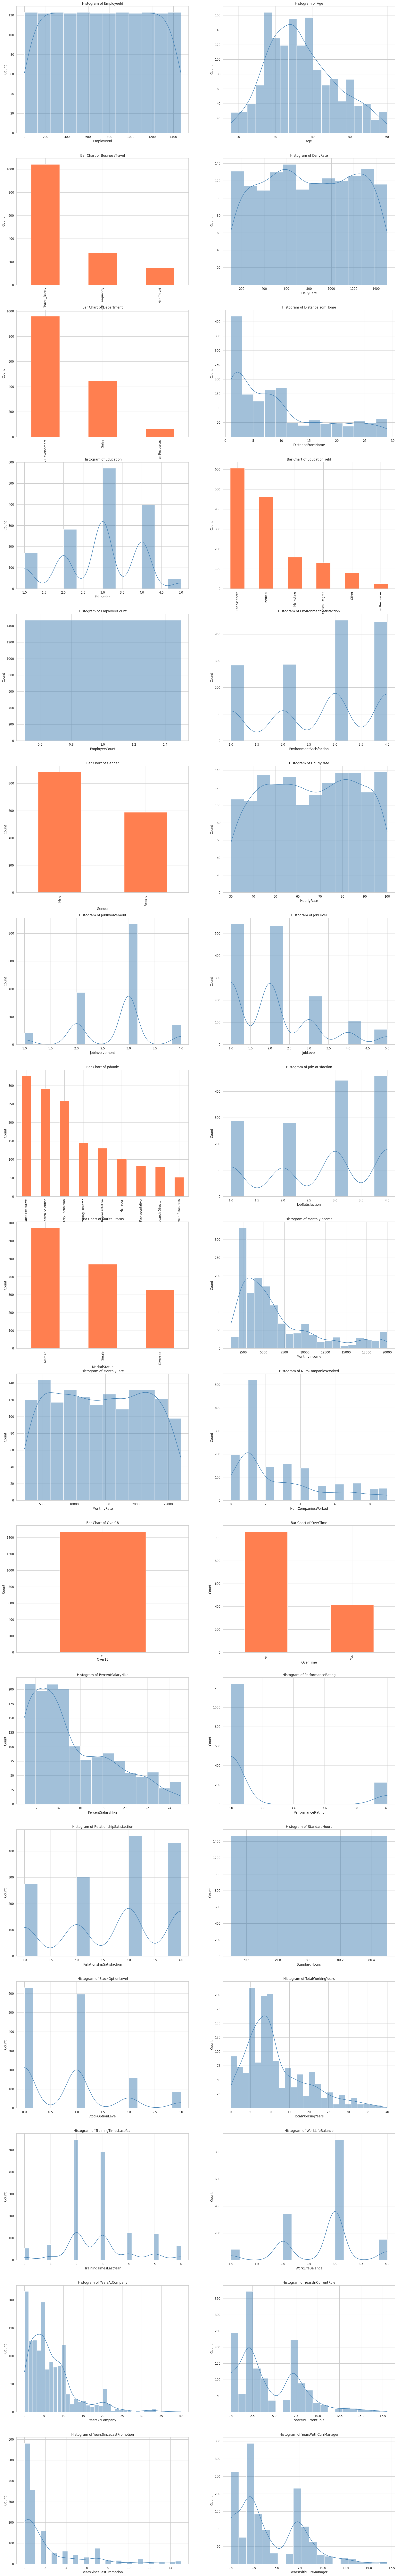

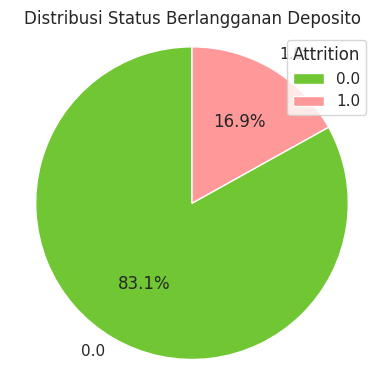

In [30]:
def visualisasiData(df, label_column):
    # Setup tampilan
    sns.set(style="whitegrid")
    n_cols = 2
    cols = df.columns.drop(label_column)
    n_rows = (len(cols) + 1) // n_cols

    plt.figure(figsize=(25, n_rows * 10))

    for idx, col in enumerate(cols):
        plt.subplot(n_rows, n_cols, idx + 1)
        if pd.api.types.is_numeric_dtype(df[col]):
            sns.histplot(df[col], kde=True, color="steelblue")
            plt.title(f'Histogram of {col}')
        else:
            df[col].value_counts().plot(kind='bar', color='coral')
            plt.title(f'Bar Chart of {col}')
            plt.xlabel(col)
            plt.ylabel("Count")

    # Visualisasi pie chart untuk label
    label_counts = df[label_column].value_counts()
    labels = label_counts.index.tolist()
    plt.figure(figsize=(4, 4))
    plt.pie(label_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=["#71c733",'#ff9999'])
    plt.title('Distribusi Status Berlangganan Deposito')
    plt.legend(title=label_column)
    plt.axis('equal')  # Circle pie chart

    plt.tight_layout()
    plt.show()

# Panggil fungsi
visualisasiData(data, 'Attrition')


**Penjelasan :**

Pada visualisasi yang diberikan, dapat diperoleh sebaran dari variabel prediktor hingga variabel target. Berdasarkan visualisasi Pie Chart pada variabel target, terlihat bahwa data berada pada kondisi *Imbalanced*, di mana klasifikasi pegawai mengalami Attrition sebanyak 16,9%, sedangkan persentase pegawai yang tidak mengalami Attrition sebesar 83,1%. Kondisi ini dapat membuat model cenderung bias pada kelas mayoritas, sehingga kekurangan informasi untuk class minoritas. 

Pada visualisasi variabel prediktor, terlihat beberapa variabel memiliki sebaran yang beragam, seperti berdistribusi normal, multi modal, hingga menceng kanan atau menceng kiri. Selain itu terdapat variabel yang tidak memberikan variasi seperti Over18. Hal ini mengindikasikan bahwa variabel tersebut tidak memberikan pengaruh yang bagus pada model karena variasinya yang minim.  

### 3. Cek Nilai Unik pada Variabel Kategorik

In [31]:
for feature in data.select_dtypes(include='object'):
    print(feature)
    print("Daftar Nilai : ",data[feature].unique(), '\n')

BusinessTravel
Daftar Nilai :  ['Travel_Frequently' 'Travel_Rarely' 'Non-Travel'] 

Department
Daftar Nilai :  ['Human Resources' 'Research & Development' 'Sales'] 

EducationField
Daftar Nilai :  ['Other' 'Medical' 'Life Sciences' 'Marketing' 'Technical Degree'
 'Human Resources'] 

Gender
Daftar Nilai :  ['Male' 'Female'] 

JobRole
Daftar Nilai :  ['Human Resources' 'Healthcare Representative' 'Research Scientist'
 'Sales Executive' 'Manager' 'Laboratory Technician' 'Research Director'
 'Manufacturing Director' 'Sales Representative'] 

MaritalStatus
Daftar Nilai :  ['Married' 'Single' 'Divorced'] 

Over18
Daftar Nilai :  ['Y'] 

OverTime
Daftar Nilai :  ['Yes' 'No'] 



**Penjelasan :**

Pada kode ini terlihat bahwa masing-masing variabel kategorik yang didefinisi memiliki beberapa nilai unik. Hal ini dapat dilihat pada variabel BussinessTravel, Department, MaritalStatus memiliki 3 nilai unik, variabel Gender dan Overtime memiliki 2 nilai unik, JobRole memiliki 9 nilai unik, dan variabel Over18 yang sebelumnya menunjukkan variasi minim telah dibuktikan hanya memiliki 1 nilai unik.

### 3. Pengecekan Missing Value

In [32]:
# Cek jumlah missing value per kolom
print("Jumlah missing value per kolom:")
print(data.isnull().sum())


Jumlah missing value per kolom:
EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLife

**Penjelasan :**

Pada pengecekan missing value terlihat secara keseluruhan variabel tidak memiliki missing value kecuali variabel target **Attrition** memiliki 412 missing value. Berkaitan dengan variabel target, maka perlakuan imputasi tidak dapat dilakukan karena akan berpengaruh pada tahap pemodelan. Berdasarkan kondisi tersebut, dalam mengatasi missing value pada data, diberi perlakuan berupa Eliminasi Observasi yang memiliki missing value.

## Data Preparation / Preprocessing

### 1. Encoding Variabel Kategorik

In [33]:
def preprocessingData(df, kolom, jenis=1, save_dir="Encoder Tersimpan", ordinal_order=None, use=False):
    os.makedirs(save_dir, exist_ok=True)
    encoder_path = os.path.join(save_dir, f"{kolom}_encoder.pkl")

    if jenis == 1:  # Label Encoding
        if use:
            with open(encoder_path, 'rb') as file:
                le = pickle.load(file)
            df[kolom] = le.transform(df[kolom])
        else:
            le = LabelEncoder()
            df[kolom] = le.fit_transform(df[kolom])
            with open(encoder_path, 'wb') as file:
                pickle.dump(le, file)
        return df, le

    elif jenis == 2:  # One Hot Encoding
        if use:
            with open(encoder_path, 'rb') as file:
                ohe = pickle.load(file)
            transformed = ohe.transform(df[[kolom]])
        else:
            ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
            transformed = ohe.fit_transform(df[[kolom]])
            with open(encoder_path, 'wb') as file:
                pickle.dump(ohe, file)

        ohe_df = pd.DataFrame(transformed, columns=[f"{kolom}_{cat}" for cat in ohe.categories_[0]], index=df.index)
        df = pd.concat([df.drop(columns=[kolom]), ohe_df], axis=1)
        return df, ohe


    elif jenis == 3:  # Ordinal Encoding
        if ordinal_order is None:
            raise ValueError(f"Untuk kolom '{kolom}', 'ordinal_order' harus disediakan untuk Ordinal Encoding.")

        df[kolom] = df[kolom].astype(str)

        if use:
            with open(encoder_path, 'rb') as file:
                oe = pickle.load(file)
            df[kolom] = oe.transform(df[[kolom]])
        else:
            oe = OrdinalEncoder(categories=[ordinal_order])
            df[kolom] = oe.fit_transform(df[[kolom]])
            with open(encoder_path, 'wb') as file:
                pickle.dump(oe, file)
        return df, oe

    else:
        raise ValueError("Jenis encoding tidak valid: gunakan 1 (Label), 2 (One Hot), atau 3 (Ordinal)")

def pipelinePemrosesan(df, save_dir="Encoder Tersimpan", use=False):
    # Definisikan urutan ordinal
    urutanTravel = [
        'Non-Travel','Travel_Rarely','Travel_Frequently'
    ]

    # ====================== Ordinal Encoding ===========================
    df, _ = preprocessingData(df, 'BusinessTravel', jenis=3, ordinal_order=urutanTravel, save_dir=save_dir, use=use)
    
    # ====================== Label Encoding =============================
    label_columns = [
        'Gender','MaritalStatus','OverTime'
    ]
    for col in label_columns:
        df, _ = preprocessingData(df, col, jenis=1, save_dir=save_dir, use=use)

    # ====================== One Hot Encoding ===========================
    onehot_columns = ['Department','EducationField','JobRole']
    for col in onehot_columns:
        df, _ = preprocessingData(df, col, jenis=2, save_dir=save_dir, use=use)

    return df


dataset = pipelinePemrosesan(data.copy(), use = False) # False hanya untuk proses pelatihan 

**Penjelasan :**

Fungsi ini digunakan untuk membentuk pipeline pemrosesan berkaitan dengan inference cell ataupun pelatihan, dimana hal ini dicirikan oleh parameter use, jika bernilai True maka akan memanggil variabel encoder yang sudah tersimpan di folder **Encoder Tersimpan**, sedangkan saat bernilai False, maka akan melakukan fit untuk encodernya. Pada pemrosesan yang dilakukan, encoder yang digunakan berupa One Hot Encoding, Label Encoder, dan Ordinal Encoding. One Hot Encoding digunakna untuk perlakuan pada data bertipe nominal, Label Encoder digunakan untuk data biner, dan Ordinal Encoder untuk variabel bertipe Ordinal. Penggunaan encoder tersebut diatur oleh parameter jenis pada fungsi preprocessingData, dimana 1 untuk Ordinal Encoder, 2 untuk Label Encoder, dan 3 untuk One Hot Encoding. Saat proses fit terhadap variabel tertentu sudah dilakukan, encoder akan disimpan dalam format pkl.  

### 2. Eliminasi Observasi yang terdapat missing value

In [34]:
dataBaru = dataset.dropna()

**Penjelasan :**

Dalam mengatasi missing value, dilakukan eliminasi observasi dengan menghilangkan baris yang terdapat missing value.

### 3. Hilangkan kolom Over18 karena nilainya sama untuk seluruh Observasi

In [35]:
dataBaru = dataBaru.drop(columns=['Over18','EmployeeId','EmployeeCount'])

**Penjelasan :**

Variabel Over18 dan EmployeeCount dihilangkan dari dataframe karena memiliki variasi yang minim, yaitu seluruh observasi hanya memiliki 1 isian. Hal ini berarti variabel tersebut tidak memberi pengaruh pada variabel target karena tidak menangkap perubahan terhadap variabel target. Selain itu, variabel EmployeeId juga dilakukan eliminasi karena memberikan keterangan ID yang tidak secara langsung berpengaruh karena merupakan penciri dari suatu observasi.

### 4. Splitting Data

In [36]:
dataBaru.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1058 non-null   int64  
 1   Attrition                          1058 non-null   float64
 2   BusinessTravel                     1058 non-null   float64
 3   DailyRate                          1058 non-null   int64  
 4   DistanceFromHome                   1058 non-null   int64  
 5   Education                          1058 non-null   int64  
 6   EnvironmentSatisfaction            1058 non-null   int64  
 7   Gender                             1058 non-null   int64  
 8   HourlyRate                         1058 non-null   int64  
 9   JobInvolvement                     1058 non-null   int64  
 10  JobLevel                           1058 non-null   int64  
 11  JobSatisfaction                    1058 non-null   int64  
 1

**Penjelasan :**

Pada metadata dataframe terlihat bahwa sudah tidak terdapat missing value pada data serta data sudah bertipe numerik sehingga bisa dilanjutkan pada tahap pemodelan.

### 5. Splitting Data

In [37]:
# Tentukan target dan pisahkan X, y
target = 'Attrition'
y = dataBaru[target]
X = dataBaru.drop(columns=[target])

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# Simpan urutan kolom dari fitur pelatihan
feature_order = X_train.columns.tolist()

# Path penyimpanan (bisa disesuaikan)
save_path = "Encoder Tersimpan/kolomfit_attrition.pkl"

with open(save_path, "wb") as f:
    pickle.dump(feature_order, f)

print("Feature order berhasil disimpan.")

Feature order berhasil disimpan.


**Penjelasan :**

Pada proses splitting digunakan proporsi data latih dan data uji sebesar 80 : 20 yang dilanjutkan dengan standardisasi data menggunakna MinMaxScaler sehingga variabel yang digunakan berada pada selang 0 hingga 1 untuk variabel yang dari awal bertipe numerik. Scaler yang sudah fit akan disimpan untuk digunakan saat inference cell.

## Modeling

In [38]:
def modelling(X_train, y_train, X_test, y_test, model_name, n_trials, use_class_weight=False, random_state=42):
    def objective(trial):
        if model_name == 'rf':
            params = {
                'n_estimators' : trial.suggest_int('n_estimators', 50, 1000),
                'min_samples_split' : trial.suggest_int('min_samples_split', 2, 20),
                'min_samples_leaf' : trial.suggest_int('min_samples_leaf', 1, 20),
                'bootstrap' : trial.suggest_categorical('bootstrap', [True, False]),
                'criterion' : trial.suggest_categorical('criterion', ['log_loss', 'entropy', 'gini']),
                'max_features' : trial.suggest_categorical('max_features', ['sqrt', 'log2'])
            }
            if use_class_weight:
                params['class_weight'] = 'balanced'
            model = RandomForestClassifier(**params)

        elif model_name == 'logreg':
            params = {
                'C': trial.suggest_float('C', 1e-3, 10),
                'penalty': trial.suggest_categorical('penalty', ['l1', 'l2']),
                'solver': trial.suggest_categorical('solver', ['liblinear', 'saga']),
                'random_state': random_state,
                'max_iter': 1000
            }
            if use_class_weight:
                params['class_weight'] = 'balanced'
            model = LogisticRegression(**params)

        else:
            raise ValueError("Model name must be 'rf' or 'logreg'.")

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        return f1_score(y_test, y_pred)

    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=n_trials)

    print(f"Best {model_name} Parameters:", study.best_params)

    # Build best model
    best_params = study.best_params.copy()
    if model_name == 'rf':
        best_params.update({'random_state': random_state})
        if use_class_weight:
            best_params['class_weight'] = 'balanced'
        best_model = RandomForestClassifier(**best_params)

    elif model_name == 'logreg':
        best_params.update({'random_state': random_state, 'max_iter': 1000})
        if use_class_weight:
            best_params['class_weight'] = 'balanced'
        best_model = LogisticRegression(**best_params)

    best_model.fit(X_train, y_train)
    y_test_pred = best_model.predict(X_test)
    f1_test = f1_score(y_test, y_test_pred)

    eval_df = pd.DataFrame({
        'Set': ['Test'],
        'F1-Score': [f1_test]
    })

    return best_model, study.best_params, eval_df


**Penjelasan :**

Fungsi Modelling digunakan untuk membentuk model dengan opsi menggunakan Regresi Logistik dan Random Forest Classifier. Pendekatan ini digunakan untuk memberi sudut pandang berbeda karena regresi logistik yang merupakan dari statistika parametrik dan random forest yang merupakan pendekatan dari statistika non parametrik. Dalam proses pembangunan model juga dilakukan proses hyperparameter tuning menggunakan library Optuna yang mengimplementasikan algoritma Tree Structure Parzen Estimator (TPE). Selain itu untuk menambah eksplorasi, dilakukan penambahan perlakuan berupa *class weighting* untuk melihat efeknya dalam mengatasi kondisi imbalanced dataset.

### 1. Modelling Regresi Logistik

In [39]:
# Tanpa Balancing Weight
modelRegLog, paramTerbaikRL, evalRegLog = modelling(X_train, y_train, X_test, y_test, 'logreg', 10, use_class_weight=False, random_state=42)
# Dengan Class Weight
modelRegLogv2, paramTerbaikRLv2, evalRegLogv2 = modelling(X_train, y_train, X_test, y_test, 'logreg', 10, use_class_weight=True, random_state=42)


[I 2025-06-18 17:46:15,829] A new study created in memory with name: no-name-31ed8193-52ba-4de2-a98f-4c31d46c16bb
[I 2025-06-18 17:46:16,835] Trial 0 finished with value: 0.0 and parameters: {'C': 0.1459855383305618, 'penalty': 'l2', 'solver': 'saga'}. Best is trial 0 with value: 0.0.
[I 2025-06-18 17:46:16,988] Trial 1 finished with value: 0.5806451612903226 and parameters: {'C': 4.334386911173423, 'penalty': 'l1', 'solver': 'liblinear'}. Best is trial 1 with value: 0.5806451612903226.
[I 2025-06-18 17:46:18,028] Trial 2 finished with value: 0.0 and parameters: {'C': 3.7194584205772, 'penalty': 'l2', 'solver': 'saga'}. Best is trial 1 with value: 0.5806451612903226.
[I 2025-06-18 17:46:18,082] Trial 3 finished with value: 0.47058823529411764 and parameters: {'C': 0.421293166506097, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 1 with value: 0.5806451612903226.
[I 2025-06-18 17:46:19,155] Trial 4 finished with value: 0.0 and parameters: {'C': 0.7106700345412732, 'penalty': 'l2

Best logreg Parameters: {'C': 4.334386911173423, 'penalty': 'l1', 'solver': 'liblinear'}


[I 2025-06-18 17:46:24,329] Trial 0 finished with value: 0.44642857142857145 and parameters: {'C': 6.5207154914412415, 'penalty': 'l1', 'solver': 'liblinear'}. Best is trial 0 with value: 0.44642857142857145.
[I 2025-06-18 17:46:25,566] Trial 1 finished with value: 0.3333333333333333 and parameters: {'C': 5.699540953603177, 'penalty': 'l1', 'solver': 'saga'}. Best is trial 0 with value: 0.44642857142857145.
[I 2025-06-18 17:46:25,824] Trial 2 finished with value: 0.4642857142857143 and parameters: {'C': 1.8914805914954487, 'penalty': 'l1', 'solver': 'liblinear'}. Best is trial 2 with value: 0.4642857142857143.
[I 2025-06-18 17:46:26,002] Trial 3 finished with value: 0.45045045045045046 and parameters: {'C': 0.7393225023497118, 'penalty': 'l1', 'solver': 'liblinear'}. Best is trial 2 with value: 0.4642857142857143.
[I 2025-06-18 17:46:26,098] Trial 4 finished with value: 0.45045045045045046 and parameters: {'C': 6.519724823084297, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 2

Best logreg Parameters: {'C': 1.8914805914954487, 'penalty': 'l1', 'solver': 'liblinear'}


**Penjelasan :**

Pada pembentukan model regresi logistik dengan dan tanpa class weighting, diperoleh best model dengan konfigurasi berikut.

1. Tanpa Class Weighting

Best logreg Parameters: {'C': 4.334386911173423, 'penalty': 'l1', 'solver': 'liblinear'}
F1-Score = 0,581

2. Dengan Class Weighting

Best logreg Parameters: {'C': 1.8914805914954487, 'penalty': 'l1', 'solver': 'liblinear'}
F1-Score = 0,464

Berdasarkan pemodelan tersebut terlihat bahwa model Regresi Logistik tanpa perlakuan Class Weighting memberikan model yang lebih baik dengan nilai F1-Score lebih besar yaitu 0,581. Hal ini menunjukkan bahwa Class Weighting kurang cocok untuk ditetapkan pada kasus ini di algoritma Regresi Logistik.

### 2. Modelling dengan Random Forest

In [40]:
# Tanpa Balancing Weight
modelRF, paramTerbaikRF, evalRF = modelling(X_train, y_train, X_test, y_test, 'rf', 10, use_class_weight=False, random_state=42)
# Dengan Class Weight
modelRFv2, paramTerbaikRFv2, evalRFv2 = modelling(X_train, y_train, X_test, y_test, 'rf', 10, use_class_weight=True, random_state=42)

[I 2025-06-18 17:46:29,981] A new study created in memory with name: no-name-47fb4637-2209-4635-a78a-1f4185bd118d
[I 2025-06-18 17:46:31,262] Trial 0 finished with value: 0.15384615384615385 and parameters: {'n_estimators': 360, 'min_samples_split': 11, 'min_samples_leaf': 6, 'bootstrap': True, 'criterion': 'entropy', 'max_features': 'log2'}. Best is trial 0 with value: 0.15384615384615385.
[I 2025-06-18 17:46:33,433] Trial 1 finished with value: 0.10256410256410256 and parameters: {'n_estimators': 725, 'min_samples_split': 5, 'min_samples_leaf': 14, 'bootstrap': False, 'criterion': 'log_loss', 'max_features': 'log2'}. Best is trial 0 with value: 0.15384615384615385.
[I 2025-06-18 17:46:33,834] Trial 2 finished with value: 0.10526315789473684 and parameters: {'n_estimators': 131, 'min_samples_split': 10, 'min_samples_leaf': 12, 'bootstrap': True, 'criterion': 'log_loss', 'max_features': 'log2'}. Best is trial 0 with value: 0.15384615384615385.
[I 2025-06-18 17:46:34,217] Trial 3 finish

Best rf Parameters: {'n_estimators': 360, 'min_samples_split': 11, 'min_samples_leaf': 6, 'bootstrap': True, 'criterion': 'entropy', 'max_features': 'log2'}


[I 2025-06-18 17:46:47,915] A new study created in memory with name: no-name-1a19294b-4533-4455-af08-e91d8dfbb0a3
[I 2025-06-18 17:46:51,415] Trial 0 finished with value: 0.46153846153846156 and parameters: {'n_estimators': 853, 'min_samples_split': 3, 'min_samples_leaf': 3, 'bootstrap': False, 'criterion': 'entropy', 'max_features': 'sqrt'}. Best is trial 0 with value: 0.46153846153846156.
[I 2025-06-18 17:46:52,988] Trial 1 finished with value: 0.5151515151515151 and parameters: {'n_estimators': 437, 'min_samples_split': 20, 'min_samples_leaf': 2, 'bootstrap': False, 'criterion': 'entropy', 'max_features': 'log2'}. Best is trial 1 with value: 0.5151515151515151.
[I 2025-06-18 17:46:55,006] Trial 2 finished with value: 0.47619047619047616 and parameters: {'n_estimators': 672, 'min_samples_split': 16, 'min_samples_leaf': 16, 'bootstrap': True, 'criterion': 'log_loss', 'max_features': 'log2'}. Best is trial 1 with value: 0.5151515151515151.
[I 2025-06-18 17:46:57,010] Trial 3 finished w

Best rf Parameters: {'n_estimators': 437, 'min_samples_split': 20, 'min_samples_leaf': 2, 'bootstrap': False, 'criterion': 'entropy', 'max_features': 'log2'}


**Penjelasan :**

Pada pembentukan model Random Forest dengan dan tanpa class weighting, diperoleh best model dengan konfigurasi berikut.

1. Tanpa Class Weighting

Best rf Parameters: {'n_estimators': 360, 'min_samples_split': 11, 'min_samples_leaf': 6, 'bootstrap': True, 'criterion': 'entropy', 'max_features': 'log2'}
F1-Score = 0,154

2. Dengan Class Weighting

Best rf Parameters: {'n_estimators': 437, 'min_samples_split': 20, 'min_samples_leaf': 2, 'bootstrap': False, 'criterion': 'entropy', 'max_features': 'log2'}
F1-Score = 0,515

Berdasarkan pemodelan tersebut terlihat bahwa model Random Forest dengan perlakuan Class Weighting memberikan model yang lebih baik dengan nilai F1-Score lebih besar yaitu 0,515. Hal ini menunjukkan bahwa Class Weighting efektif untuk ditetapkan pada kasus ini di algoritma Random Forest.

**Kesimpulan Model :**

Berdasarkan pelatihan dan evaluasi pemodelan diperoleh bahwa model terbaik adalah Regresi Logistik tanpa Class Weighting dengan nilai F1-Score sebesar 0.581. Hal ini menjadikan model tersebut sebagai model terbaik dalam penelitian ini.

## Evaluation

### 1. Pendefinisian Fungsi Evaluasi Model Terbaik

In [41]:
def evaluasiModel(judul, model, X_train, y_train, X_test, y_test, save_dir="Model Tersimpan"):
    print(judul)
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)

    # Evaluasi metrik
    bal_acc = balanced_accuracy_score(y_test, y_test_pred)
    f1_macro = f1_score(y_test, y_test_pred, average='macro')
    acc = accuracy_score(y_test, y_test_pred)

    # Cek apakah model mendukung predict_proba atau decision_function
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test)
    else:
        y_score = None

    # Hitung AUC jika memungkinkan
    auc_score = roc_auc_score(y_test, y_score) if y_score is not None else None

    print("Final Balanced Accuracy pada Data Uji :", bal_acc)
    print("F1 Score (Macro) : ", f1_macro)
    print("Accuracy : ", acc)
    if auc_score is not None:
        print("AUC Score:", auc_score)
    else:
        print("AUC Score: Tidak tersedia")

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Pred 0', 'Pred 1'], 
                yticklabels=['True 0', 'True 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.show()

    # Simpan model
    os.makedirs(save_dir, exist_ok=True)
    model_path = os.path.join(save_dir, f"{judul.replace(' ', '_')}.pkl")
    # Simpan model dengan benar
    with open(model_path, 'wb') as file:
        pickle.dump(model, file)
    print(f"Model disimpan di: {model_path}")

    return {
        "Skenario": judul,
        "Balanced Accuracy": bal_acc,
        "F1 Score (Macro)": f1_macro,
        "Accuracy": acc,
        "AUC": auc_score,
        "Model Path": model_path
    }

**Penjelasan :**

Fungsi ini digunakan untuk mengevaluasi model klasifikasi dengan inputan berupa nama model, model, data latih dan data uji. Fungsi akan mengebalikan dictionary yang berisi ukuran evaluasi berupa Balanced Accuracy, F1 Score, Accuracy, dan ROC-AUC. 

### 2. Evaluasi Model Terbaik

Model Terbaik
Final Balanced Accuracy pada Data Uji : 0.7272727272727273
F1 Score (Macro) :  0.7544109784352165
Accuracy :  0.8773584905660378
AUC Score: 0.8178661616161617

Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.93       176
         1.0       0.69      0.50      0.58        36

    accuracy                           0.88       212
   macro avg       0.80      0.73      0.75       212
weighted avg       0.87      0.88      0.87       212



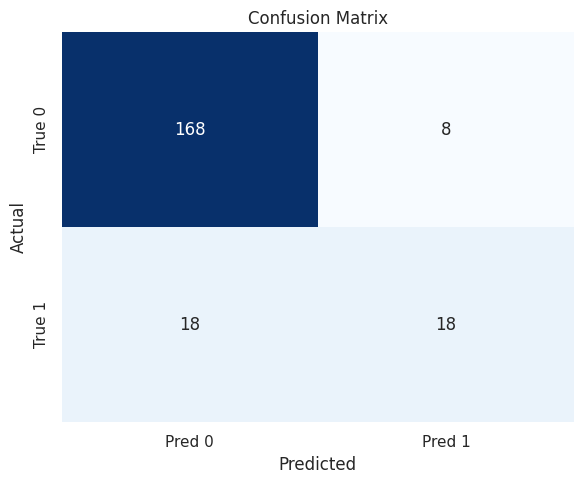

Model disimpan di: Model Tersimpan/Model_Terbaik.pkl


In [47]:
hasilFinal = evaluasiModel("Model Terbaik", modelRegLog, X_train, y_train, X_test, y_test)

**Penjelasan :**

Berdasarkan evaluasi yang dilakukan, diperoleh ukuran evaluasi sebagai berikut.

**Balanced Accuracy pada Data Uji** : 0.727

**F1 Score (Macro)** :  0.754

**Accuracy** :  0.877

**AUC Score** : 0.818

**Classification Report**:
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.93       176
         1.0       0.69      0.50      0.58        36

    accuracy                           0.88       212

Berdasarkan nilai tersebut, terlihat bahwa nilai ukuran berupa akurasi cukup tinggi yaitu sebesar 0,88 atau 88%. Hal ini menunjukkan kebaikan model klasifikasi yang dibangun. Namun, ukuran tersebut kurang sesuai digunakan untuk data imbalanced, sehingga ditinjau pula ukuran yang tidak bias pada data imbalanced seperti Balanced Accuracy, F1 Score, dan AUC Score. Terlihat bahwa nilai ukuran evaluasi tersebut berturut-turut adalah 0.727, 0.754, dan 0.818. Hal ini menunjukkan model yang dibangun sudah cukup baik secara rata-rata pada kedua class. Pada classification report juga terlihat nilai yang cukup baik, walaupun pada class minoritas yaitu 1 nilai F1 score sebesar 0.58. Namun nilai tersebut cenderung baik karena > 50%. Secara keseluruhan ukuran evaluasi sudah menunjukkan kondisi model yang cukup baik untuk dapat diimplementasikan pada kasus nyata dalam memperkirakan Attrition Rates seseorang karyawan.

### 3. Identifikasi Variabel dengan Pengaruh Terbesar terhadap Model

In [49]:
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': modelRegLog.coef_[0],
    'Importance': np.abs(modelRegLog.coef_[0])
}).sort_values(by='Importance', ascending=False)


In [50]:
importance_df

,Feature,Coefficient,Importance
15,OverTime,2.081262,2.081262
42,JobRole_Research Director,-1.436409,1.436409
45,JobRole_Sales Representative,1.284976,1.284976
39,JobRole_Laboratory Technician,1.252113,1.252113
1,BusinessTravel,1.013239,1.013239
31,EducationField_Human Resources,-0.986147,0.986147
38,JobRole_Human Resources,0.941039,0.941039
36,EducationField_Technical Degree,0.833583,0.833583
43,JobRole_Research Scientist,0.702479,0.702479
11,MaritalStatus,0.657519,0.657519


**Interpretasi Koefisien :**

1. OverTime (2.05)
Karyawan yang bekerja lembur cenderung memiliki kemungkinan jauh lebih tinggi untuk keluar dibandingkan yang tidak lembur.

2. BusinessTravel (1.06)
Karyawan yang sering melakukan perjalanan dinas menunjukkan kecenderungan lebih tinggi untuk keluar.

3. JobInvolvement (-0.69)
Karyawan dengan keterlibatan kerja yang tinggi memiliki kecenderungan lebih rendah untuk keluar dari perusahaan.

4. MaritalStatus (0.64)
Terdapat kecenderungan tertentu berdasarkan status pernikahan; misalnya, karyawan lajang mungkin lebih cenderung keluar dibanding yang menikah.

5. Department (0.53)
Karyawan di departemen tertentu menunjukkan kecenderungan lebih tinggi untuk keluar, tergantung pada divisi tempat mereka bekerja.

6. EnvironmentSatisfaction (-0.51)
Semakin puas terhadap lingkungan kerja, semakin kecil kecenderungan karyawan untuk keluar.

7. WorkLifeBalance (-0.43)
Keseimbangan kerja dan kehidupan pribadi yang baik menurunkan kecenderungan karyawan untuk keluar.

8. Gender (0.36)
Terdapat perbedaan kecenderungan antar jenis kelamin terhadap keputusan untuk keluar.

## Deployment

In [51]:
def inferenceCell(input_data):
    # Load urutan kolom saat training
    with open("Encoder Tersimpan/kolomfit_attrition.pkl", "rb") as f:
        feature_order = pickle.load(f)

    # Pastikan input dalam bentuk DataFrame
    if isinstance(input_data, dict):
        input_df = pd.DataFrame([input_data])
    elif isinstance(input_data, pd.DataFrame):
        input_df = input_data.copy()
    else:
        raise ValueError("Input harus berupa dict atau DataFrame")

    # Proses preprocessing
    data_processed = pipelinePemrosesan(input_df, use=True)
    
    # Pastikan urutan kolom sesuai training
    data_processed = data_processed[feature_order]

    # Load model dan prediksi
    with open("Model Tersimpan/Model_Terbaik.pkl", "rb") as f:
        model = pickle.load(f)

    prediction = model.predict(data_processed)
    if prediction[0] == 0:
        prediksi = 'No'
    else:
        prediksi = 'Yes'
    print("Hasil Prediksi:", prediksi)
    
    return prediksi

In [53]:
# Load data dari CSV
data_path = "Data/employee.csv"
df = pd.read_csv(data_path)
data = df.drop(columns=['Attrition','EmployeeId','EmployeeCount','Over18'])
# Ambil observasi pertama sebagai input
input_sample = data.iloc[4]

# Konversi ke dict agar sesuai dengan fungsi inferenceCell
input_dict = input_sample.to_dict()
# Panggil fungsi prediksi
hasil = inferenceCell(input_dict)


Hasil Prediksi: No
